In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

**step 1. 데이터 탐색 및 시각화**

In [2]:
df = pd.read_csv('dataset_null.csv')
df.head()

,date,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,2020 10 30 00:00:04,297.0,222,251,267.0,209,219.0,229,239,240,239,241,240,240,40,41,0.0,71.2215,72,0.0
1,2020 10 30 00:00:09,297.0,222,251,268.0,210,219.0,229,239,240,239,240,240,240,40,41,0.0,71.2096,72,0.0
2,2020 10 30 00:00:14,297.0,222,251,267.0,210,219.0,229,239,240,239,240,240,240,40,41,0.0,71.1977,72,0.0
3,2020 10 30 00:00:19,297.0,222,251,267.0,210,219.0,229,240,240,239,241,240,240,40,41,0.0,71.1977,72,0.0
4,2020 10 30 00:00:24,297.0,222,251,267.0,210,219.0,229,239,240,239,241,240,240,40,41,0.0,71.1977,72,0.0


In [3]:
df1 = df.drop(['date'], axis=1, inplace=False)
df1.head()

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,297.0,222,251,267.0,209,219.0,229,239,240,239,241,240,240,40,41,0.0,71.2215,72,0.0
1,297.0,222,251,268.0,210,219.0,229,239,240,239,240,240,240,40,41,0.0,71.2096,72,0.0
2,297.0,222,251,267.0,210,219.0,229,239,240,239,240,240,240,40,41,0.0,71.1977,72,0.0
3,297.0,222,251,267.0,210,219.0,229,240,240,239,241,240,240,40,41,0.0,71.1977,72,0.0
4,297.0,222,251,267.0,210,219.0,229,239,240,239,241,240,240,40,41,0.0,71.1977,72,0.0


In [4]:
df1.columns

Index(['EX5.MELT_TEMP', 'EX4.MELT_TEMP', 'EX3.MELT_TEMP', 'EX2.MELT_TEMP',
       'EX1.Z1_PV', 'EX1.Z2_PV', 'EX1.Z3_PV', 'EX1.Z4_PV', 'EX1.A1_PV',
       'EX1.A2_PV', 'EX1.H1_PV', 'EX1.H2_PV', 'EX1.H3_PV', 'EX1.H4_PV',
       'EX1.H2O_PV', 'EX1.MELT_P_PV', 'EX1.MD_PV', 'EX1.MD_TQ', 'passorfail'],
      dtype='object')

1. 데이터 피처들의 기초 통계량 (평균, 중앙값, 분산 등)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EX5.MELT_TEMP  17261 non-null  float64
 1   EX4.MELT_TEMP  17280 non-null  int64  
 2   EX3.MELT_TEMP  17280 non-null  int64  
 3   EX2.MELT_TEMP  17268 non-null  float64
 4   EX1.Z1_PV      17280 non-null  int64  
 5   EX1.Z2_PV      17265 non-null  float64
 6   EX1.Z3_PV      17280 non-null  int64  
 7   EX1.Z4_PV      17280 non-null  int64  
 8   EX1.A1_PV      17280 non-null  int64  
 9   EX1.A2_PV      17280 non-null  int64  
 10  EX1.H1_PV      17280 non-null  int64  
 11  EX1.H2_PV      17280 non-null  int64  
 12  EX1.H3_PV      17280 non-null  int64  
 13  EX1.H4_PV      17280 non-null  int64  
 14  EX1.H2O_PV     17280 non-null  int64  
 15  EX1.MELT_P_PV  17280 non-null  float64
 16  EX1.MD_PV      17280 non-null  float64
 17  EX1.MD_TQ      17280 non-null  int64  
 18  passor

In [6]:
df1.describe()

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
count,17261.000000,17280.000000,17280.000000,17268.000000,17280.000000,17265.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17257.000000
mean,296.390765,221.892245,251.021470,266.929291,209.786516,219.619056,229.677951,239.676273,239.576100,239.572106,239.590278,239.599769,239.627199,40.372338,42.125637,6.010608,70.897139,71.895833,0.006374
std,0.588185,0.369363,0.637443,0.578102,1.628204,0.496368,0.473549,0.477824,0.501628,0.586524,0.562705,0.529909,0.547126,1.802481,3.367409,5.914024,4.494657,2.736710,0.079586
min,294.000000,219.000000,249.000000,265.000000,201.000000,217.000000,228.000000,237.000000,239.000000,237.000000,237.000000,237.000000,236.000000,35.000000,37.000000,0.000000,0.000000,0.000000,0.000000
25%,296.000000,222.000000,251.000000,267.000000,209.000000,219.000000,229.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,39.000000,39.000000,0.000000,71.185800,72.000000,0.000000
50%,296.000000,222.000000,251.000000,267.000000,210.000000,220.000000,230.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,40.000000,42.000000,4.812500,71.197700,72.000000,0.000000
75%,297.000000,222.000000,251.000000,267.000000,210.000000,220.000000,230.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,42.000000,45.000000,10.062500,71.209600,72.000000,0.000000
max,300.000000,223.000000,253.000000,269.000000,218.000000,221.000000,232.000000,242.000000,241.000000,242.000000,242.000000,241.000000,244.000000,44.000000,49.000000,22.662500,75.612600,72.000000,1.000000


In [7]:
df1.shape

(17280, 19)

In [8]:
df1.isnull().sum()

EX5.MELT_TEMP    19
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP    12
EX1.Z1_PV         0
EX1.Z2_PV        15
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
passorfail       23
dtype: int64

In [9]:
fail = df1[df1.passorfail == 1].shape[0]
normal = df1[df1.passorfail == 0].shape[0]
fail_rate = (fail/(fail+normal))*100
print(f'양품 수: {normal} 불량 수: {fail}\n불량률: {fail_rate}')

양품 수: 17147 불량 수: 110
불량률: 0.6374224952193313


2. 피처들의 데이터 분포 시각화

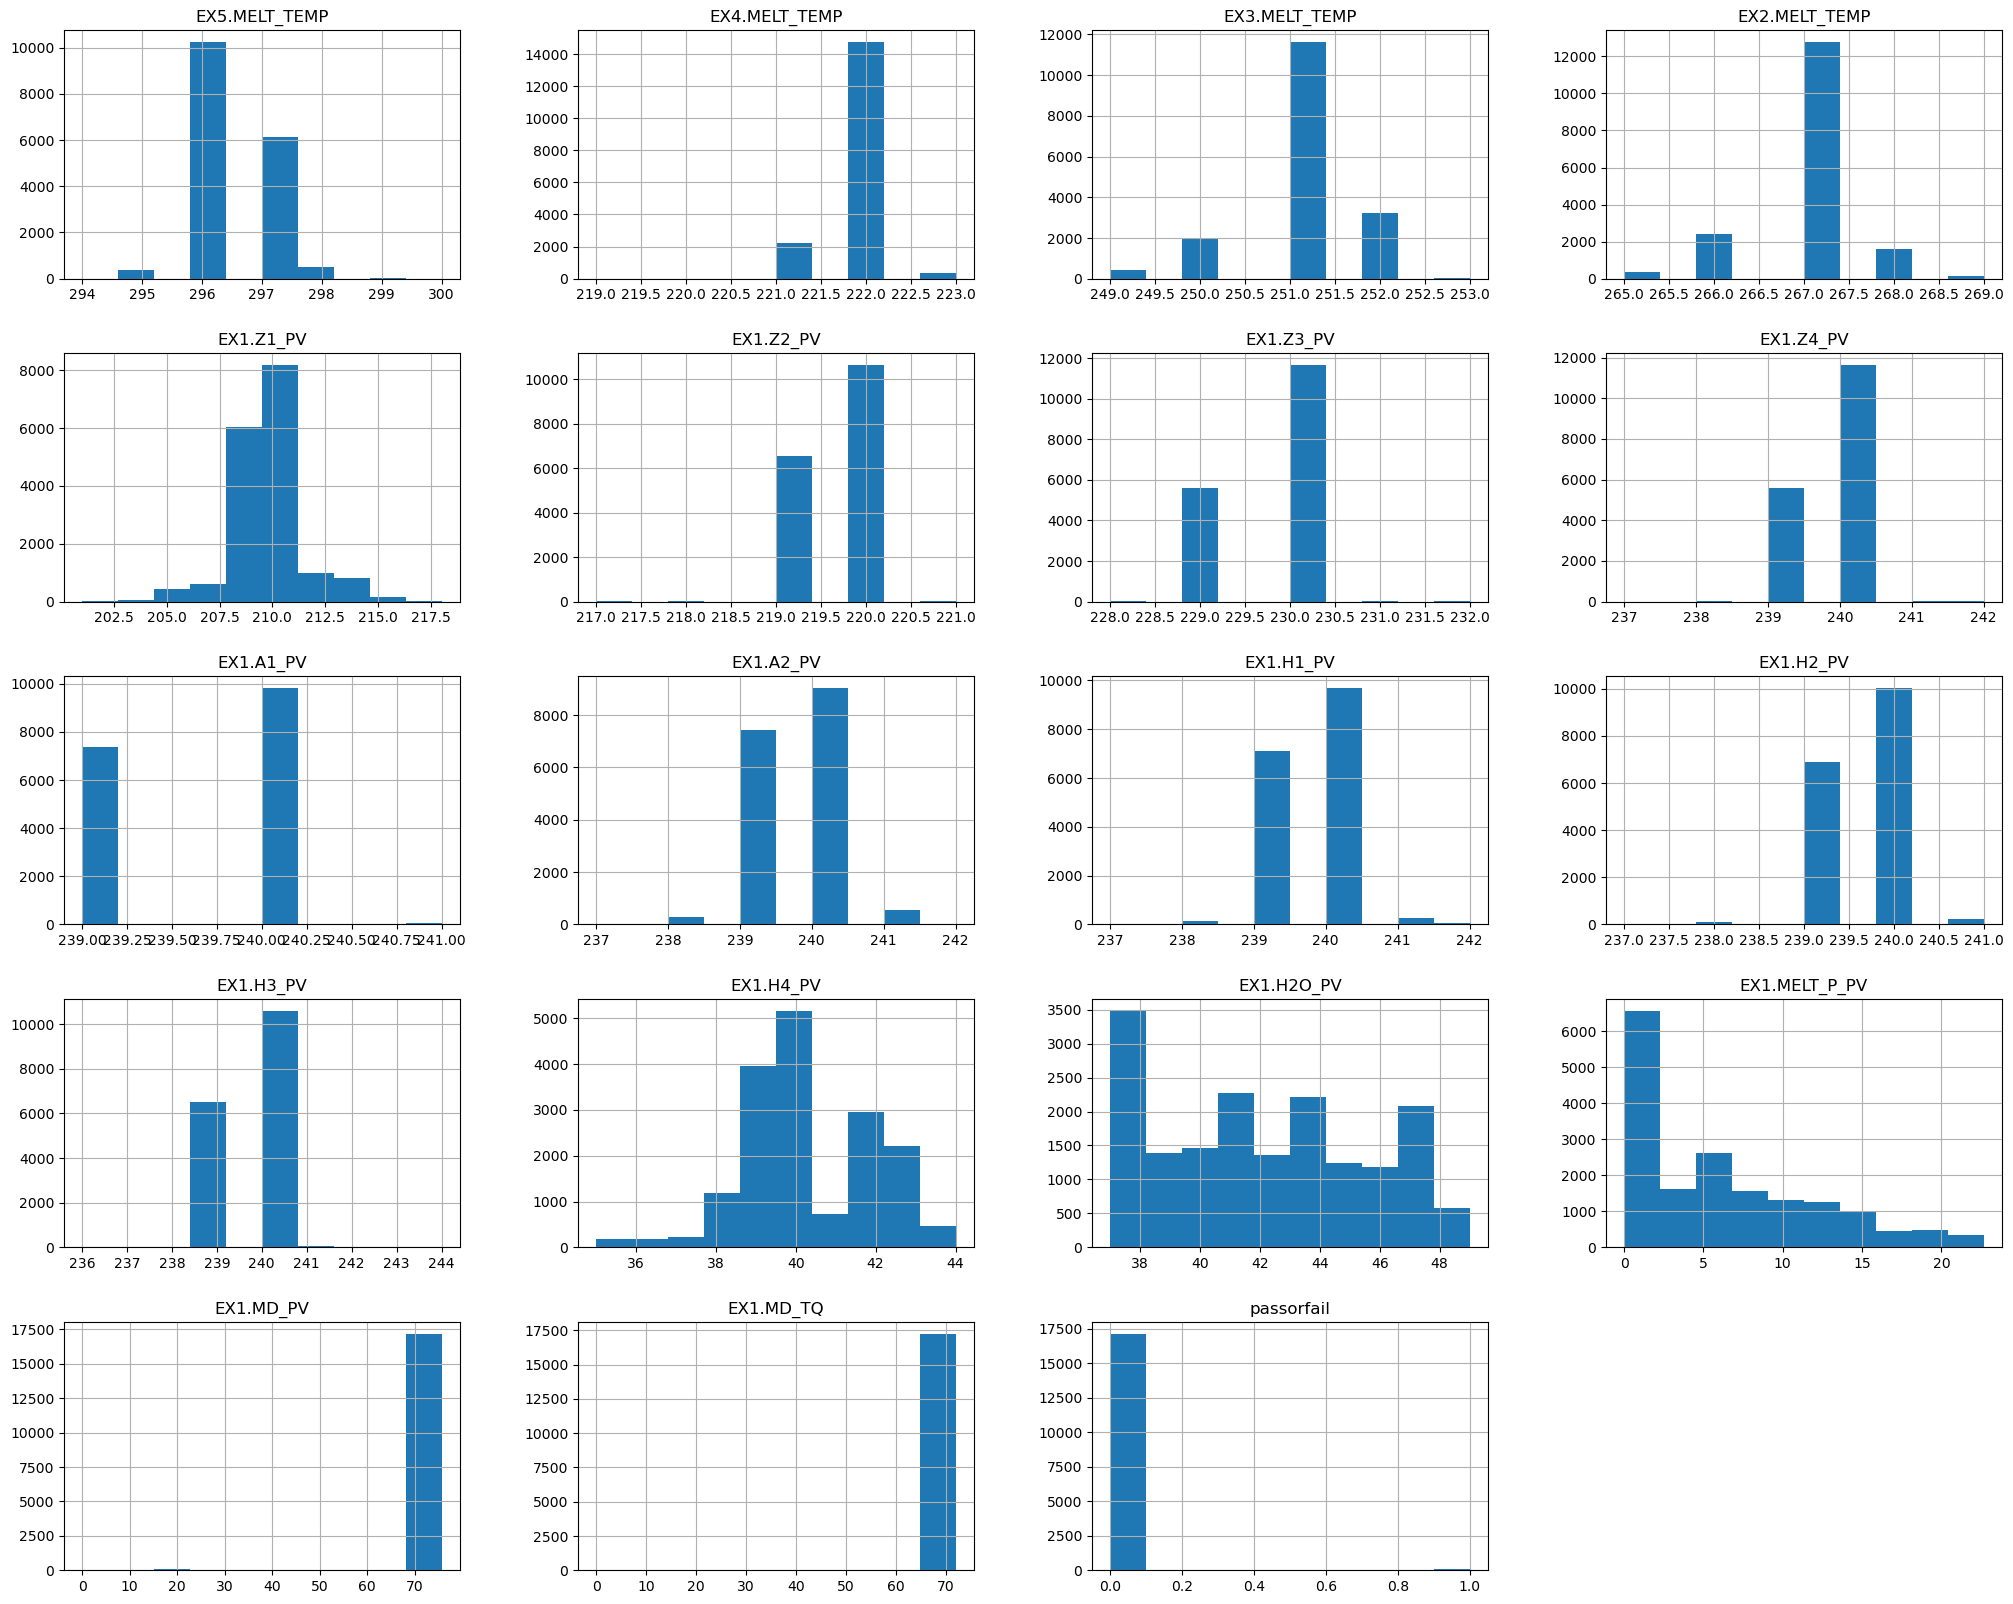

In [10]:
df1.hist(figsize=(25,20))
plt.show()

**step2. 데이터 전처리**

1. 결측치 처리

In [11]:
df2 = df1.astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EX5.MELT_TEMP  17261 non-null  float64
 1   EX4.MELT_TEMP  17280 non-null  float64
 2   EX3.MELT_TEMP  17280 non-null  float64
 3   EX2.MELT_TEMP  17268 non-null  float64
 4   EX1.Z1_PV      17280 non-null  float64
 5   EX1.Z2_PV      17265 non-null  float64
 6   EX1.Z3_PV      17280 non-null  float64
 7   EX1.Z4_PV      17280 non-null  float64
 8   EX1.A1_PV      17280 non-null  float64
 9   EX1.A2_PV      17280 non-null  float64
 10  EX1.H1_PV      17280 non-null  float64
 11  EX1.H2_PV      17280 non-null  float64
 12  EX1.H3_PV      17280 non-null  float64
 13  EX1.H4_PV      17280 non-null  float64
 14  EX1.H2O_PV     17280 non-null  float64
 15  EX1.MELT_P_PV  17280 non-null  float64
 16  EX1.MD_PV      17280 non-null  float64
 17  EX1.MD_TQ      17280 non-null  float64
 18  passor

In [12]:
df2.isnull().sum()

EX5.MELT_TEMP    19
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP    12
EX1.Z1_PV         0
EX1.Z2_PV        15
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
passorfail       23
dtype: int64

In [13]:
df2 = df1.dropna(subset=["passorfail"])
df2.shape

(17257, 19)

In [14]:
df2.isnull().sum()

EX5.MELT_TEMP    19
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP    12
EX1.Z1_PV         0
EX1.Z2_PV        15
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
passorfail        0
dtype: int64

2. 이상치 처리

In [15]:
# 이상치 값을 0.1%의 상/하한 값으로 대체
for col in df2.columns[0:-1]:
    upper_bound = np.percentile(df2[col], 99.9)
    lower_bound = np.percentile(df2[col], 0.1)
    df2.loc[df2[col] > upper_bound, col] = upper_bound
    df2.loc[df2[col] < lower_bound, col] = lower_bound
df2.head()

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
0,297.0,222,251,267.0,209,219.0,229,239,240,239,241,240,240,40,41,0.0,71.2215,72,0.0
1,297.0,222,251,268.0,210,219.0,229,239,240,239,240,240,240,40,41,0.0,71.2096,72,0.0
2,297.0,222,251,267.0,210,219.0,229,239,240,239,240,240,240,40,41,0.0,71.1977,72,0.0
3,297.0,222,251,267.0,210,219.0,229,240,240,239,241,240,240,40,41,0.0,71.1977,72,0.0
4,297.0,222,251,267.0,210,219.0,229,239,240,239,241,240,240,40,41,0.0,71.1977,72,0.0


In [16]:
df2.describe()

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
count,17238.000000,17257.000000,17257.000000,17245.000000,17257.000000,17242.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000,17257.000000
mean,296.390881,221.892391,251.019818,266.929197,209.783103,219.618954,229.677522,239.675146,239.575766,239.571189,239.589732,239.599409,239.626876,40.372834,42.126210,6.015914,70.896726,71.895695,0.006374
std,0.588328,0.368338,0.635418,0.578482,1.616428,0.496407,0.470527,0.474358,0.501688,0.584175,0.562881,0.529809,0.546857,1.803630,3.369574,5.915737,4.497629,2.738531,0.079586
min,294.000000,221.000000,249.000000,265.000000,203.000000,217.000000,229.000000,238.000000,239.000000,238.000000,237.000000,238.000000,236.000000,35.000000,37.000000,0.000000,0.000000,0.000000,0.000000
25%,296.000000,222.000000,251.000000,267.000000,209.000000,219.000000,229.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,39.000000,39.000000,0.000000,71.185800,72.000000,0.000000
50%,296.000000,222.000000,251.000000,267.000000,210.000000,220.000000,230.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,40.000000,42.000000,4.812500,71.197700,72.000000,0.000000
75%,297.000000,222.000000,251.000000,267.000000,210.000000,220.000000,230.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,42.000000,45.000000,10.062500,71.209600,72.000000,0.000000
max,300.000000,223.000000,252.000000,269.000000,217.000000,221.000000,231.000000,241.000000,241.000000,241.000000,242.000000,241.000000,243.000000,44.000000,49.000000,22.531300,75.576900,72.000000,1.000000


**step2.5 상관관계 분석**

1. 피처 간 상관 관계 시각화

<Axes: >

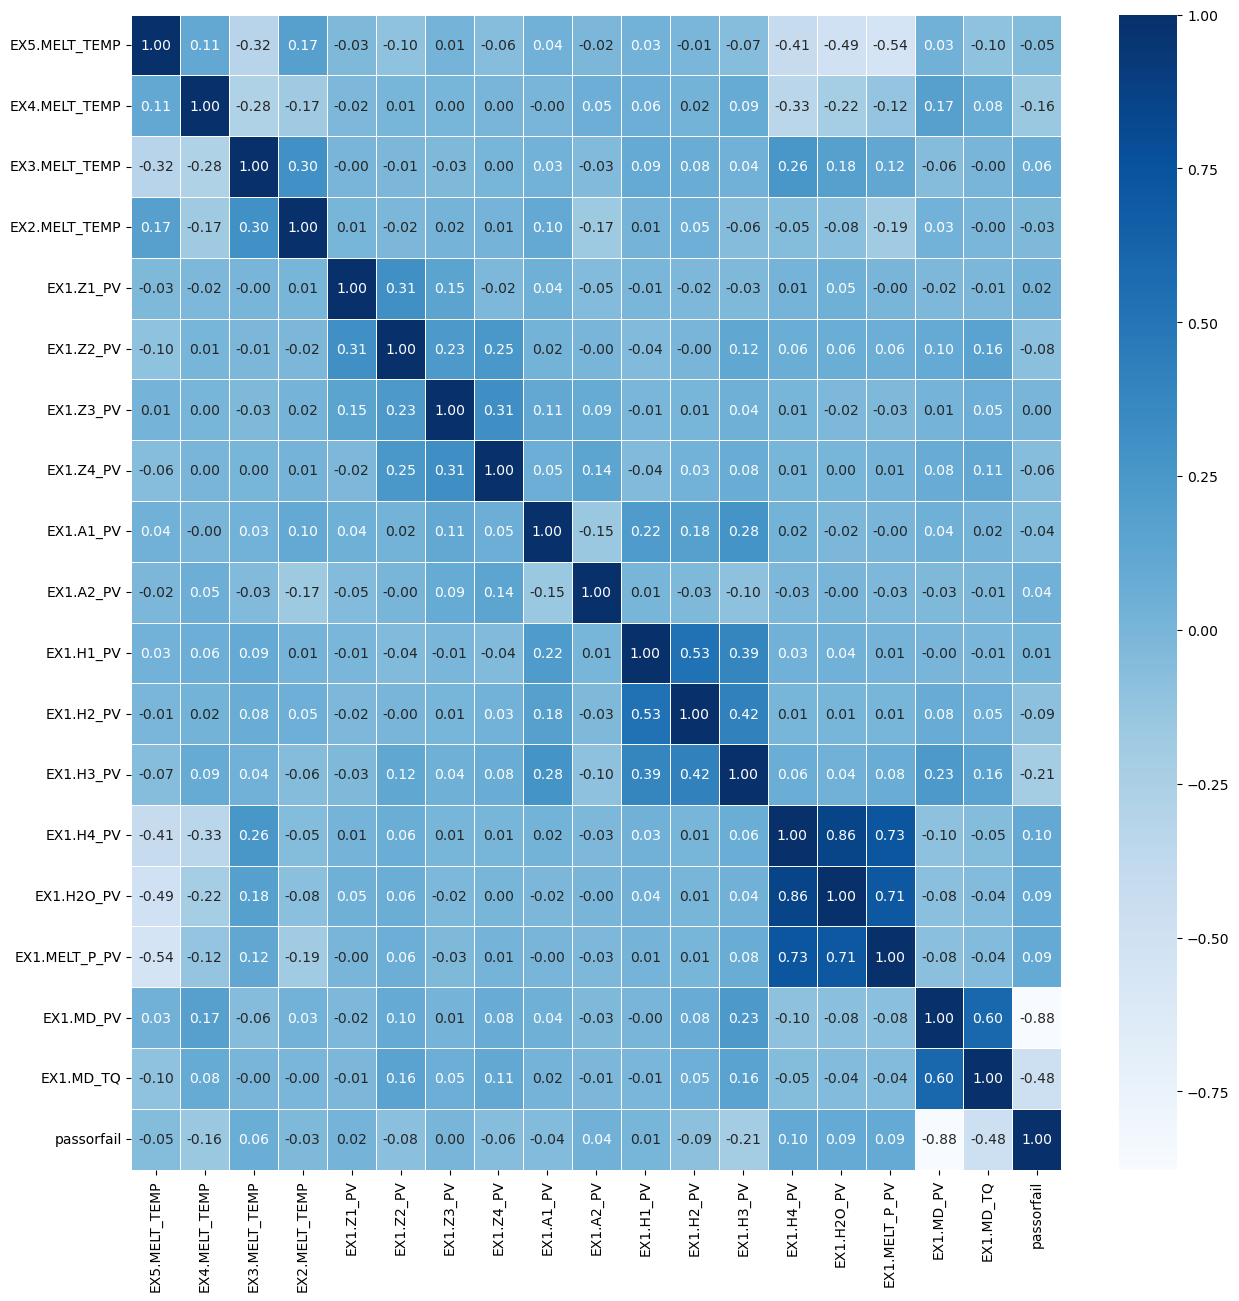

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [18]:
corr_matrix = df2.corr()
corr_matrix

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail
EX5.MELT_TEMP,1.000000,0.109939,-0.315895,0.173882,-0.032874,-0.104826,0.010866,-0.064050,0.039234,-0.015008,0.030025,-0.010577,-0.067802,-0.413944,-0.489426,-0.541417,0.033367,-0.101646,-0.054483
EX4.MELT_TEMP,0.109939,1.000000,-0.279344,-0.173714,-0.019737,0.007736,0.002728,0.000911,-0.004328,0.054860,0.057616,0.019036,0.086341,-0.332926,-0.217005,-0.122838,0.172582,0.084011,-0.158471
EX3.MELT_TEMP,-0.315895,-0.279344,1.000000,0.297319,-0.003827,-0.014646,-0.031732,0.003864,0.031647,-0.034088,0.093539,0.075914,0.037959,0.257756,0.179525,0.117915,-0.058457,-0.001210,0.063966
EX2.MELT_TEMP,0.173882,-0.173714,0.297319,1.000000,0.005696,-0.018096,0.015972,0.014752,0.101029,-0.170589,0.011167,0.052128,-0.057349,-0.053807,-0.083772,-0.193491,0.026257,-0.004664,-0.030487
EX1.Z1_PV,-0.032874,-0.019737,-0.003827,0.005696,1.000000,0.308568,0.147584,-0.022970,0.042455,-0.048117,-0.006473,-0.020802,-0.027509,0.010943,0.046032,-0.000313,-0.020852,-0.014537,0.015703
EX1.Z2_PV,-0.104826,0.007736,-0.014646,-0.018096,0.308568,1.000000,0.232028,0.246498,0.024139,-0.003243,-0.035163,-0.003787,0.122494,0.062847,0.064148,0.060264,0.095348,0.158057,-0.080836
EX1.Z3_PV,0.010866,0.002728,-0.031732,0.015972,0.147584,0.232028,1.000000,0.311355,0.112471,0.087423,-0.007690,0.005047,0.044945,0.006816,-0.019725,-0.031666,0.011010,0.054847,0.000731
EX1.Z4_PV,-0.064050,0.000911,0.003864,0.014752,-0.022970,0.246498,0.311355,1.000000,0.054728,0.139087,-0.035804,0.027967,0.075121,0.009490,0.004044,0.011441,0.077614,0.112028,-0.063345
EX1.A1_PV,0.039234,-0.004328,0.031647,0.101029,0.042455,0.024139,0.112471,0.054728,1.000000,-0.154298,0.217615,0.182328,0.276151,0.018286,-0.018444,-0.000832,0.043933,0.016382,-0.042576
EX1.A2_PV,-0.015008,0.054860,-0.034088,-0.170589,-0.048117,-0.003243,0.087423,0.139087,-0.154298,1.000000,0.005995,-0.032650,-0.095257,-0.025137,-0.001267,-0.025003,-0.033178,-0.014919,0.036358


In [19]:
corr_matrix["passorfail"].sort_values(ascending=False)

passorfail       1.000000
EX1.H4_PV        0.103346
EX1.MELT_P_PV    0.092517
EX1.H2O_PV       0.090786
EX3.MELT_TEMP    0.063966
EX1.A2_PV        0.036358
EX1.Z1_PV        0.015703
EX1.H1_PV        0.005342
EX1.Z3_PV        0.000731
EX2.MELT_TEMP   -0.030487
EX1.A1_PV       -0.042576
EX5.MELT_TEMP   -0.054483
EX1.Z4_PV       -0.063345
EX1.Z2_PV       -0.080836
EX1.H2_PV       -0.089245
EX4.MELT_TEMP   -0.158471
EX1.H3_PV       -0.208991
EX1.MD_TQ       -0.475554
EX1.MD_PV       -0.877250
Name: passorfail, dtype: float64

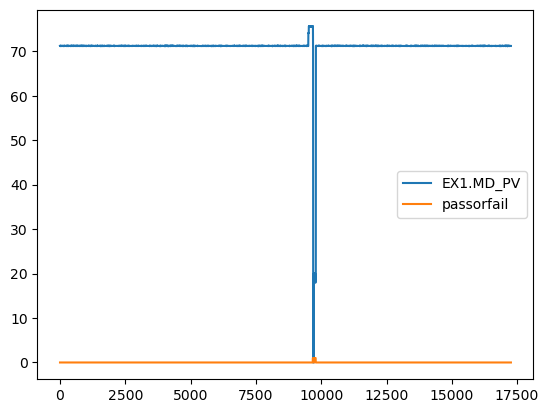

In [20]:
plt.plot(df2['EX1.MD_PV'], label='EX1.MD_PV')
plt.plot(df2['passorfail'], label='passorfail')
plt.legend()
plt.show()

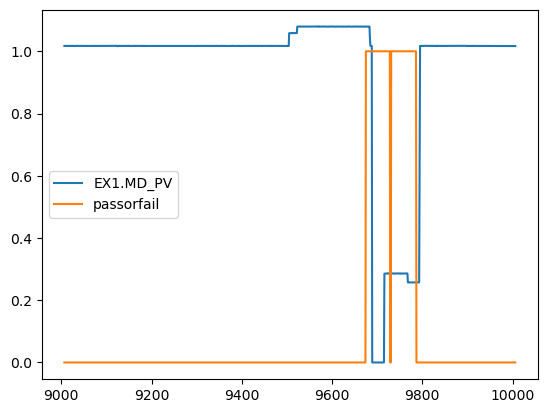

In [21]:
plt.plot((df2['EX1.MD_PV'][9000:10000])/70, label='EX1.MD_PV')
plt.plot(df2['passorfail'][9000:10000], label='passorfail')
plt.legend()
plt.show()

2. 특성 조합으로 실험 / 피쳐 엔지니어링

In [22]:
df2["multiply"] = df2["EX1.MD_PV"] * df2["EX1.MD_TQ"]
df2["ratio"] = df2["EX1.MD_PV"] / df2["EX1.H4_PV"]

In [23]:
corr_matrix = df2.corr()
corr_matrix
corr_matrix["passorfail"].sort_values(ascending=False)

passorfail       1.000000
EX1.H4_PV        0.103346
EX1.MELT_P_PV    0.092517
EX1.H2O_PV       0.090786
EX3.MELT_TEMP    0.063966
EX1.A2_PV        0.036358
EX1.Z1_PV        0.015703
EX1.H1_PV        0.005342
EX1.Z3_PV        0.000731
EX2.MELT_TEMP   -0.030487
EX1.A1_PV       -0.042576
EX5.MELT_TEMP   -0.054483
EX1.Z4_PV       -0.063345
EX1.Z2_PV       -0.080836
EX1.H2_PV       -0.089245
EX4.MELT_TEMP   -0.158471
EX1.H3_PV       -0.208991
EX1.MD_TQ       -0.475554
ratio           -0.728169
EX1.MD_PV       -0.877250
multiply        -0.877250
Name: passorfail, dtype: float64

In [24]:
df2 = df2.drop(['multiply','ratio'], axis=1, inplace=False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17257 entries, 0 to 17263
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EX5.MELT_TEMP  17238 non-null  float64
 1   EX4.MELT_TEMP  17257 non-null  int64  
 2   EX3.MELT_TEMP  17257 non-null  int64  
 3   EX2.MELT_TEMP  17245 non-null  float64
 4   EX1.Z1_PV      17257 non-null  int64  
 5   EX1.Z2_PV      17242 non-null  float64
 6   EX1.Z3_PV      17257 non-null  int64  
 7   EX1.Z4_PV      17257 non-null  int64  
 8   EX1.A1_PV      17257 non-null  int64  
 9   EX1.A2_PV      17257 non-null  int64  
 10  EX1.H1_PV      17257 non-null  int64  
 11  EX1.H2_PV      17257 non-null  int64  
 12  EX1.H3_PV      17257 non-null  int64  
 13  EX1.H4_PV      17257 non-null  int64  
 14  EX1.H2O_PV     17257 non-null  int64  
 15  EX1.MELT_P_PV  17257 non-null  float64
 16  EX1.MD_PV      17257 non-null  float64
 17  EX1.MD_TQ      17257 non-null  int64  
 18  passor

**step3. 훈련셋/테스트셋 분리**

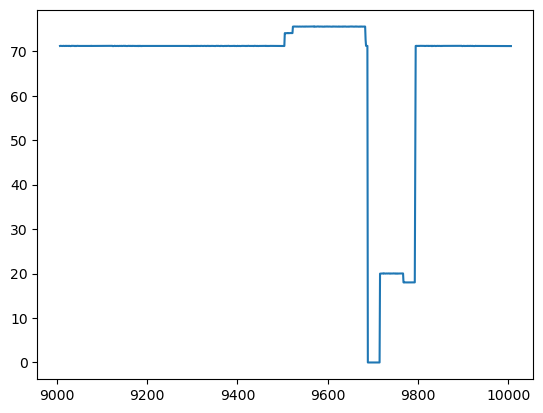

In [25]:
plt.plot(df2['EX1.MD_PV'][9000:10000])
plt.show()

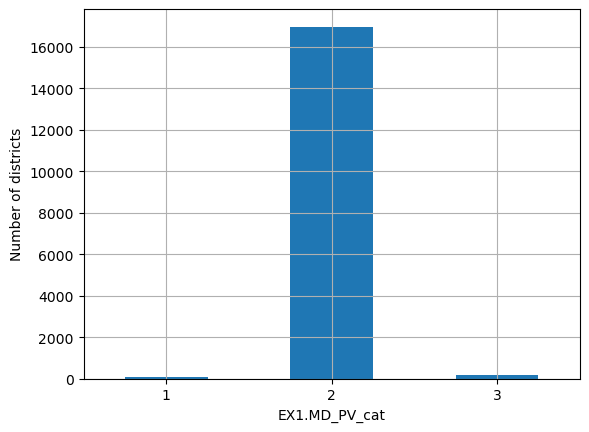

In [26]:
df2["EX1.MD_PV_cat"] = pd.cut(df2["EX1.MD_PV"],
                               bins=[-1,70,72,np.inf],
                               labels=[1,2,3])

df2["EX1.MD_PV_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("EX1.MD_PV_cat")
plt.ylabel("Number of districts")
plt.show()

In [27]:
df2["EX1.MD_PV_cat"].value_counts()

2    16971
3      180
1      106
Name: EX1.MD_PV_cat, dtype: int64

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17257 entries, 0 to 17263
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   EX5.MELT_TEMP  17238 non-null  float64 
 1   EX4.MELT_TEMP  17257 non-null  int64   
 2   EX3.MELT_TEMP  17257 non-null  int64   
 3   EX2.MELT_TEMP  17245 non-null  float64 
 4   EX1.Z1_PV      17257 non-null  int64   
 5   EX1.Z2_PV      17242 non-null  float64 
 6   EX1.Z3_PV      17257 non-null  int64   
 7   EX1.Z4_PV      17257 non-null  int64   
 8   EX1.A1_PV      17257 non-null  int64   
 9   EX1.A2_PV      17257 non-null  int64   
 10  EX1.H1_PV      17257 non-null  int64   
 11  EX1.H2_PV      17257 non-null  int64   
 12  EX1.H3_PV      17257 non-null  int64   
 13  EX1.H4_PV      17257 non-null  int64   
 14  EX1.H2O_PV     17257 non-null  int64   
 15  EX1.MELT_P_PV  17257 non-null  float64 
 16  EX1.MD_PV      17257 non-null  float64 
 17  EX1.MD_TQ      17257 non-null  

In [29]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df2, test_size=0.2, stratify = df2["EX1.MD_PV_cat"], random_state=0)

In [30]:
strat_train_set.head()

,EX5.MELT_TEMP,EX4.MELT_TEMP,EX3.MELT_TEMP,EX2.MELT_TEMP,EX1.Z1_PV,EX1.Z2_PV,EX1.Z3_PV,EX1.Z4_PV,EX1.A1_PV,EX1.A2_PV,EX1.H1_PV,EX1.H2_PV,EX1.H3_PV,EX1.H4_PV,EX1.H2O_PV,EX1.MELT_P_PV,EX1.MD_PV,EX1.MD_TQ,passorfail,EX1.MD_PV_cat
13747,296.0,222,251,267.0,215,220.0,230,240,239,239,240,240,240,42,45,11.9000,71.1858,72,0.0,2
2096,297.0,222,251,267.0,210,220.0,230,239,240,239,240,240,240,40,41,0.0000,71.1977,72,0.0,2
4186,298.0,222,251,267.0,210,220.0,230,240,240,240,239,239,240,39,38,0.0000,71.1977,72,0.0,2
2765,296.0,222,251,267.0,208,220.0,229,240,239,241,239,239,239,39,40,0.0000,71.1858,72,0.0,2
11757,296.0,222,251,267.0,210,220.0,230,240,240,240,239,240,239,44,47,22.3125,71.2096,72,0.0,2


In [31]:
strat_test_set["EX1.MD_PV_cat"].value_counts() / len(strat_test_set)

2    0.983488
3    0.010429
1    0.006083
Name: EX1.MD_PV_cat, dtype: float64

In [32]:
def acceration_cat_proportions(data):
    return data["EX1.MD_PV_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": acceration_cat_proportions(df2),
    "Stratified %": acceration_cat_proportions(strat_test_set),
    "Random %": acceration_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "EX1.MD_PV_cat"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
EX1.MD_PV_cat,,,,,
1,0.61,0.61,0.72,-0.96,17.90
2,98.34,98.35,98.17,0.01,-0.17
3,1.04,1.04,1.10,-0.02,5.54


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("EX1.MD_PV_cat", axis=1, inplace=True)

X_train = strat_train_set.drop("passorfail", axis=1)
Y_train = strat_train_set["passorfail"]
X_test = strat_test_set.drop("passorfail", axis=1)
Y_test =strat_test_set["passorfail"]

**step4. 데이터 스케일링**

1. 특성 스케일링

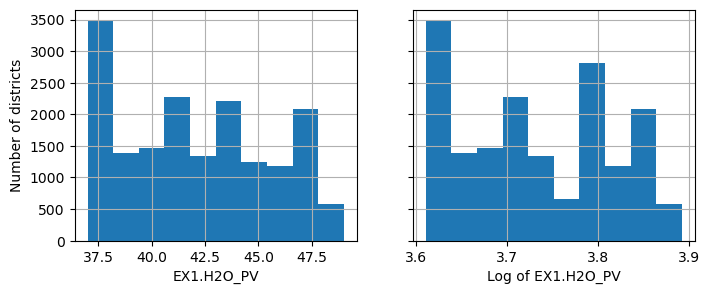

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df2["EX1.H2O_PV"].hist(ax=axs[0], bins=10)
df2["EX1.H2O_PV"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("EX1.H2O_PV")
axs[1].set_xlabel("Log of EX1.H2O_PV")
axs[0].set_ylabel("Number of districts")
plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler
df2_data = df2.drop(['passorfail'], axis=1, inplace=False)
scaler=MinMaxScaler()
scaler_df=scaler.fit_transform(df2_data)

In [36]:
scaler_df.shape

(17257, 19)

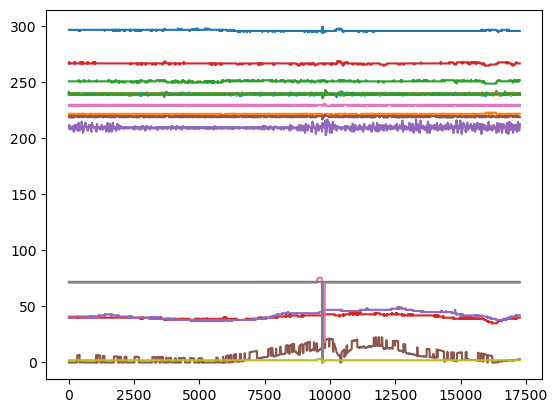

In [37]:
plt.plot(df2_data)
plt.show()

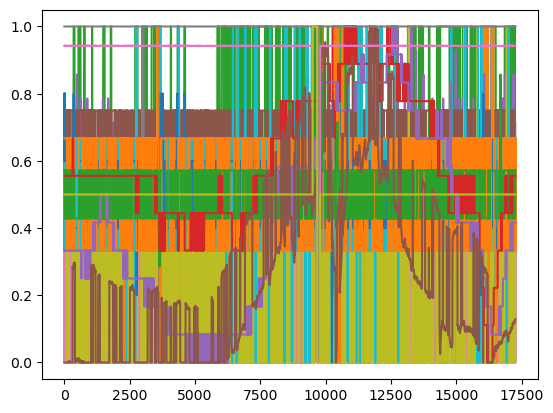

In [38]:
plt.plot(scaler_df)
plt.show()

In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputed_array = imputer.fit_transform(df2_data)
imputed_df = pd.DataFrame(imputed_array, columns=[['EX5.MELT_TEMP', 'EX4.MELT_TEMP', 'EX3.MELT_TEMP', 'EX2.MELT_TEMP',
       'EX1.Z1_PV', 'EX1.Z2_PV', 'EX1.Z3_PV', 'EX1.Z4_PV', 'EX1.A1_PV',
       'EX1.A2_PV', 'EX1.H1_PV', 'EX1.H2_PV', 'EX1.H3_PV', 'EX1.H4_PV',
       'EX1.H2O_PV', 'EX1.MELT_P_PV', 'EX1.MD_PV', 'EX1.MD_TQ', "EX1.H2O_PV_cat"]])
imputed_df.isnull().sum()

EX5.MELT_TEMP     0
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP     0
EX1.Z1_PV         0
EX1.Z2_PV         0
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
EX1.H2O_PV_cat    0
dtype: int64

**step5. 파이프라인**

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config

num_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), MinMaxScaler())
set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('minmaxscaler', MinMaxScaler())])

In [41]:
from sklearn.preprocessing import FunctionTransformer

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        MinMaxScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    MinMaxScaler())

log_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log'>)),
                ('minmaxscaler', MinMaxScaler())])

In [42]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                     MinMaxScaler())

default_num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('minmaxscaler', MinMaxScaler())])

In [43]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("MDPV_per_H4PV", ratio_pipeline(), ["EX1.MD_PV", "EX1.H4_PV"]),
    ("log", log_pipeline, ['EX1.H2O_PV'])], 
    remainder=default_num_pipeline) 

preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='most_frequent')),
                                            ('minmaxscaler', MinMaxScaler())]),
                  transformers=[('MDPV_per_H4PV',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['EX1.MD_PV', 'EX1.H4_PV']),
                                ('log',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['EX1.H2O_PV'])])

**step6. 모델 선택 및 훈련**

1. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

logistic_reg = make_pipeline(preprocessing, LogisticRegression())
logistic_reg.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('minmaxscaler',
                                                              MinMaxScaler())]),
                                   transformers=[('MDPV_per_H4PV',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.MD_PV', 'EX1.H4_PV']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.H2O_PV'])])),
                ('logisticregression', LogisticRegression())])

2. Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier 

classifier = make_pipeline(preprocessing, DecisionTreeClassifier())
classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('minmaxscaler',
                                                              MinMaxScaler())]),
                                   transformers=[('MDPV_per_H4PV',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.MD_PV', 'EX1.H4_PV']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.H2O_PV'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

3. Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier 

random_classifier = make_pipeline(preprocessing, RandomForestClassifier())
random_classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('minmaxscaler',
                                                              MinMaxScaler())]),
                                   transformers=[('MDPV_per_H4PV',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.MD_PV', 'EX1.H4_PV']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.H2O_PV'])])),
                ('randomforestclassifier', RandomForestClassifier())])

4. Adaboost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = make_pipeline(preprocessing, AdaBoostClassifier())
ada_classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='most_frequent')),
                                                             ('minmaxscaler',
                                                              MinMaxScaler())]),
                                   transformers=[('MDPV_per_H4PV',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.MD_PV', 'EX1.H4_PV']),
                                                 ('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['EX1.H2O_PV'])])),
                ('adaboostclassifier', AdaBoostClassifier())])

**step7. 모델 세부 튜닝**

1. Logistic Regression 정확도 확인

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

predict_logistic_reg = logistic_reg.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, predict_logistic_reg)) 
print("Accuracy:", accuracy_score(Y_test, predict_logistic_reg))

Confusion Matrix:  [[3430    0]
 [   3   19]]
Accuracy: 0.9991309385863267


2. Decision Tree

In [49]:
predict_classifier = classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, predict_classifier)) 
print("Accuracy:", accuracy_score(Y_test, predict_classifier))

Confusion Matrix:  [[3430    0]
 [   1   21]]
Accuracy: 0.9997103128621089


3. Random Forest

[0.9997103128621089, 0.9991309385863267, 0.9997103128621089, 0.9997103128621089, 0.9997103128621089, 0.9997103128621089, 0.9997103128621089, 0.9994206257242179, 0.9994206257242179, 0.9994206257242179, 0.9997103128621089, 0.9994206257242179, 0.9994206257242179, 0.9994206257242179]


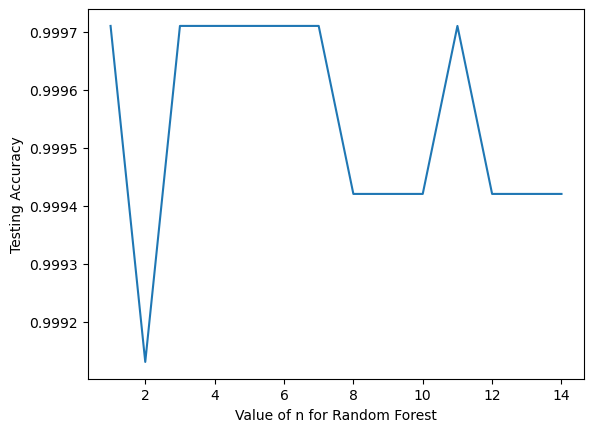

In [50]:
n_range = range(1, 15) 
accuracy_scores = []

for n in n_range:
    random_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, n_estimators=n))
    random_classifier.fit(X_train,Y_train)
    predict_random_classifier = random_classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test, predict_random_classifier)) 
print(accuracy_scores)

import matplotlib.pyplot as plt
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

In [51]:
# n_estimators=6 파라미터 확정

random_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, n_estimators=6))
random_classifier.fit(X_train,Y_train)
predict_random_classifier = random_classifier.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, predict_random_classifier)) 
print("Accuracy:", accuracy_score(Y_test, predict_random_classifier))

Confusion Matrix:  [[3430    0]
 [   1   21]]
Accuracy: 0.9997103128621089


4. Adaboost

[0.9991309385863267, 0.9973928157589803, 0.9959443800695249, 0.9991309385863267, 0.9991309385863267, 0.9982618771726536, 0.9982618771726536, 0.9991309385863267, 0.9991309385863267, 0.9991309385863267, 0.9997103128621089, 0.9991309385863267, 0.9997103128621089, 0.9997103128621089]


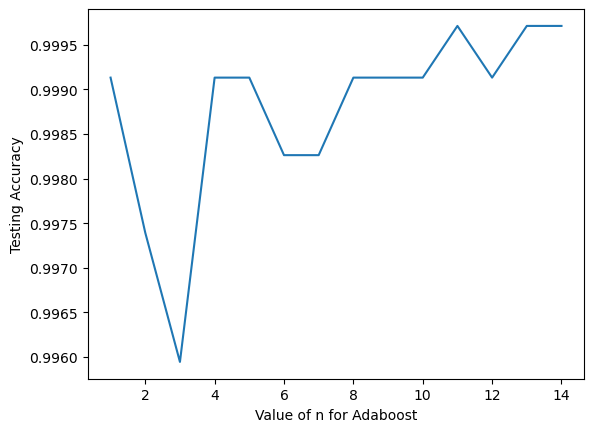

In [52]:
n_range = range(1, 15) 
accuracy_scores = []

for n in n_range:
    ada_classifier = make_pipeline(preprocessing, AdaBoostClassifier(random_state=0, n_estimators=n))
    ada_classifier.fit(X_train,Y_train)
    predict_ada_classifier = ada_classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(Y_test, predict_ada_classifier)) 
print(accuracy_scores)

import matplotlib.pyplot as plt
plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for Adaboost')
plt.ylabel('Testing Accuracy')
plt.show()

In [53]:
# n_estimators=14 파라미터 확정

ada_classifier = make_pipeline(preprocessing, AdaBoostClassifier(random_state=0, n_estimators=14))
ada_classifier.fit(X_train,Y_train)
predict_ada_classifier = ada_classifier.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(Y_test, predict_ada_classifier)) 
print("Accuracy:", accuracy_score(Y_test, predict_ada_classifier))

Confusion Matrix:  [[3430    0]
 [   1   21]]
Accuracy: 0.9997103128621089


**step8. 결과 및 결론**

1. Logistic Regression

Logistic Regression
precision: 1.0 recall: 0.8636363636363636
F1-Score: 0.9268292682926829 Accuracy: 0.9991309385863267


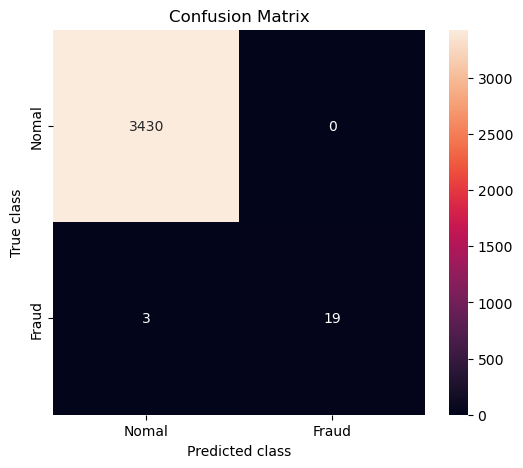

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

result = {}

#예측도
precision_logistic_reg = precision_score(Y_test, predict_logistic_reg)
#재현율
recall_logistic_reg = recall_score(Y_test, predict_logistic_reg)
#F1 Score
f1_logistic_reg = f1_score(Y_test, predict_logistic_reg)
#정확도
acc_logistic_reg = accuracy_score(Y_test, predict_logistic_reg)
#오차 행렬
cm_logistic_reg = confusion_matrix(Y_test, predict_logistic_reg)
result['Logistic Regression'] = {'precision':precision_logistic_reg, 'recall':recall_logistic_reg, 'f1-score':f1_logistic_reg, 'accuracy':acc_logistic_reg}
print(f'Logistic Regression\nprecision: {precision_logistic_reg} recall: {recall_logistic_reg}\nF1-Score: {f1_logistic_reg} Accuracy: {acc_logistic_reg}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic_reg, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

2. Decision Tree

Decision Tree
precision: 1.0 recall: 0.9545454545454546
F1-Score: 0.9767441860465117 Accuracy: 0.9997103128621089


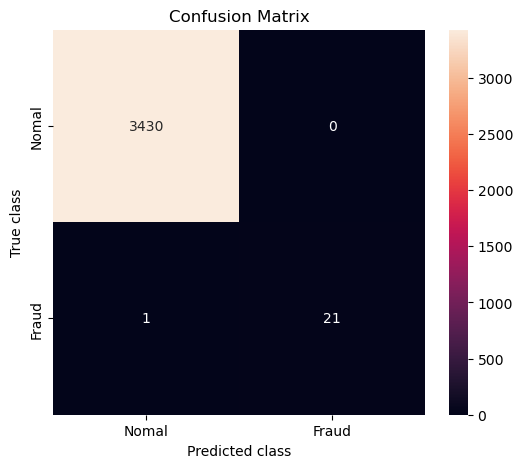

In [55]:
#예측도
precision_classifier = precision_score(Y_test, predict_classifier)
#재현율
recall_classifier = recall_score(Y_test, predict_classifier)
#F1 Score
f1_classifier = f1_score(Y_test, predict_classifier)
#정확도
acc_classifier = accuracy_score(Y_test, predict_classifier)
#오차 행렬
cm_classifier = confusion_matrix(Y_test, predict_classifier)
result['Decision Tree'] = {'precision':precision_classifier, 'recall':recall_classifier, 'f1-score':f1_classifier, 'accuracy':acc_classifier}
print(f'Decision Tree\nprecision: {precision_classifier} recall: {recall_classifier}\nF1-Score: {f1_classifier} Accuracy: {acc_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

3. Random Forest

Random Forest
precision: 1.0 recall: 0.9545454545454546
F1-Score: 0.9767441860465117 Accuracy: 0.9997103128621089


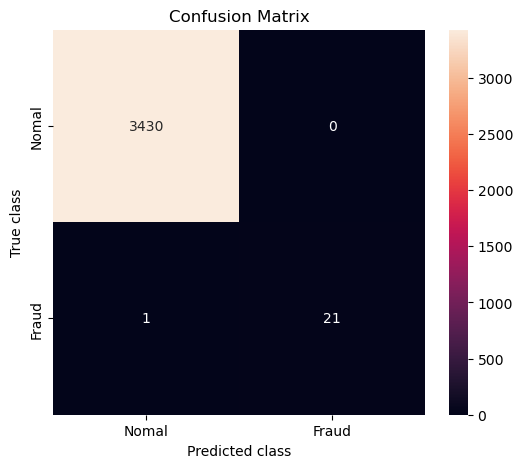

In [56]:
#예측도
precision_random_classifier = precision_score(Y_test, predict_random_classifier)
#재현율
recall_random_classifier = recall_score(Y_test, predict_random_classifier)
#F1 Score
f1_random_classifier = f1_score(Y_test, predict_random_classifier)
#정확도
acc_random_classifier = accuracy_score(Y_test, predict_random_classifier)
#오차 행렬
cm_random_classifier = confusion_matrix(Y_test, predict_random_classifier)
result['Random Forest'] = {'precision':precision_random_classifier, 'recall':recall_random_classifier, 'f1-score':f1_random_classifier, 'accuracy':acc_random_classifier}
print(f'Random Forest\nprecision: {precision_random_classifier} recall: {recall_random_classifier}\nF1-Score: {f1_random_classifier} Accuracy: {acc_random_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_random_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

4. Adaboost

AdaBoost
precision: 1.0 recall: 0.9545454545454546
F1-Score: 0.9767441860465117 Accuracy: 0.9997103128621089


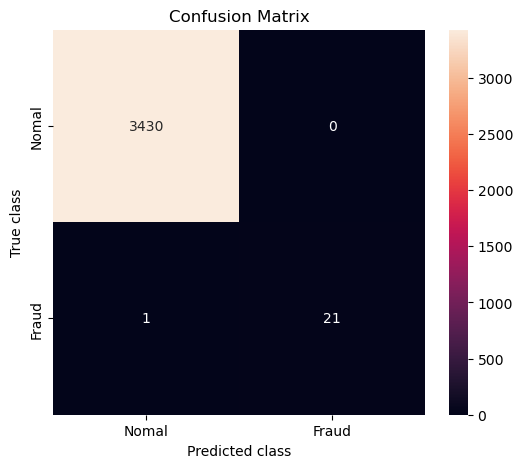

In [57]:
#예측도
precision_ada_classifier = precision_score(Y_test, predict_ada_classifier)
#재현율
recall_ada_classifier = recall_score(Y_test, predict_ada_classifier)
#F1 Score
f1_ada_classifier = f1_score(Y_test, predict_ada_classifier)
#정확도
acc_ada_classifier = accuracy_score(Y_test, predict_ada_classifier)
#오차 행렬
cm_ada_classifier = confusion_matrix(Y_test, predict_ada_classifier)
result['AdaBoost'] = {'precision':precision_ada_classifier, 'recall':recall_ada_classifier, 'f1-score':f1_ada_classifier, 'accuracy':acc_ada_classifier}
print(f'AdaBoost\nprecision: {precision_ada_classifier} recall: {recall_ada_classifier}\nF1-Score: {f1_ada_classifier} Accuracy: {acc_ada_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [58]:
pd.DataFrame(result).T

,precision,recall,f1-score,accuracy
Logistic Regression,1.0,0.863636,0.926829,0.999131
Decision Tree,1.0,0.954545,0.976744,0.999710
Random Forest,1.0,0.954545,0.976744,0.999710
AdaBoost,1.0,0.954545,0.976744,0.999710


**[추가] No-Pipeline 비교**

In [59]:
# 데이터 로드

df_nopipe = pd.read_csv('dataset_null.csv')

df1_nopipe = df_nopipe.drop(['date'], axis=1, inplace=False)
df1_nopipe.isnull().sum()

EX5.MELT_TEMP    19
EX4.MELT_TEMP     0
EX3.MELT_TEMP     0
EX2.MELT_TEMP    12
EX1.Z1_PV         0
EX1.Z2_PV        15
EX1.Z3_PV         0
EX1.Z4_PV         0
EX1.A1_PV         0
EX1.A2_PV         0
EX1.H1_PV         0
EX1.H2_PV         0
EX1.H3_PV         0
EX1.H4_PV         0
EX1.H2O_PV        0
EX1.MELT_P_PV     0
EX1.MD_PV         0
EX1.MD_TQ         0
passorfail       23
dtype: int64

In [60]:
#결측치 제거

df2_nopipe = df1_nopipe.dropna()
df2_nopipe.isnull().sum()

EX5.MELT_TEMP    0
EX4.MELT_TEMP    0
EX3.MELT_TEMP    0
EX2.MELT_TEMP    0
EX1.Z1_PV        0
EX1.Z2_PV        0
EX1.Z3_PV        0
EX1.Z4_PV        0
EX1.A1_PV        0
EX1.A2_PV        0
EX1.H1_PV        0
EX1.H2_PV        0
EX1.H3_PV        0
EX1.H4_PV        0
EX1.H2O_PV       0
EX1.MELT_P_PV    0
EX1.MD_PV        0
EX1.MD_TQ        0
passorfail       0
dtype: int64

In [61]:
#데이터 분리

data_nopipe = df2_nopipe.drop("passorfail", axis=1)
label_nopipe = df2_nopipe["passorfail"]
X_train_no, X_test_no, Y_train_no, Y_test_no = train_test_split(data_nopipe, label_nopipe, test_size=0.2, random_state=42)

In [62]:
#모델 학습

logistic_reg_no = LogisticRegression()
logistic_reg_no.fit(X_train_no, Y_train_no)

classifier_no = DecisionTreeClassifier()
classifier_no.fit(X_train_no, Y_train_no)

random_classifier_no = RandomForestClassifier()
random_classifier_no.fit(X_train_no, Y_train_no)

ada_classifier_no = AdaBoostClassifier()
ada_classifier_no.fit(X_train_no, Y_train_no)

AdaBoostClassifier()

In [63]:
# 성능평가

#예측값
predict_logistic_reg_no = logistic_reg_no.predict(X_test_no)
predict_classifier_no = classifier_no.predict(X_test_no)
predict_random_classifier_no = random_classifier_no.predict(X_test_no)
predict_ada_classifier_no = ada_classifier_no.predict(X_test_no)

#예측도
precision_logistic_reg_no = precision_score(Y_test_no, predict_logistic_reg_no)
precision_classifier_no = precision_score(Y_test_no, predict_classifier_no)
precision_random_classifier_no = precision_score(Y_test_no, predict_random_classifier_no)
precision_ada_classifier_no = precision_score(Y_test_no, predict_ada_classifier_no)

#재현율
recall_logistic_reg_no = recall_score(Y_test_no, predict_logistic_reg_no)
recall_classifier_no = recall_score(Y_test_no, predict_classifier_no)
recall_random_classifier_no = recall_score(Y_test_no, predict_random_classifier_no)
recall_ada_classifier_no = recall_score(Y_test_no, predict_ada_classifier_no)

#F1 Score
f1_logistic_reg_no = f1_score(Y_test_no, predict_logistic_reg_no)
f1_classifier_no = f1_score(Y_test_no, predict_classifier_no)
f1_random_classifier_no = f1_score(Y_test_no, predict_random_classifier_no)
f1_ada_classifier_no = f1_score(Y_test_no, predict_ada_classifier_no)

#정확도
acc_logistic_reg_no = accuracy_score(Y_test_no, predict_logistic_reg_no)
acc_classifier_no = accuracy_score(Y_test_no, predict_classifier_no)
acc_random_classifier_no = accuracy_score(Y_test_no, predict_random_classifier_no)
acc_ada_classifier_no = accuracy_score(Y_test_no, predict_ada_classifier_no)

result_nopipe = {}

#오차 행렬_로지스틱 회귀
cm_logistic_reg_no = confusion_matrix(Y_test_no, predict_logistic_reg_no)
result_nopipe['Logistic Regression_nopipe'] = {'precision':precision_logistic_reg_no, 'recall':recall_logistic_reg_no, 'f1-score':f1_logistic_reg_no, 'accuracy':acc_logistic_reg_no}
print(f'Logistic Regression_nopipe\nprecision: {precision_logistic_reg_no} recall: {recall_logistic_reg_no}\nF1-Score: {f1_logistic_reg_no} Accuracy: {acc_logistic_reg_no}')

Logistic Regression_nopipe
precision: 0.9090909090909091 recall: 0.9523809523809523
F1-Score: 0.9302325581395349 Accuracy: 0.9991294254207778


In [64]:
#오차 행렬_결정트리
cm_classifier_no = confusion_matrix(Y_test_no, predict_classifier_no)
result_nopipe['Decision Tree_nopipe'] = {'precision':precision_classifier_no, 'recall':recall_classifier_no, 'f1-score':f1_classifier_no, 'accuracy':acc_classifier_no}
print(f'Decision Tree_nopipe\nprecision: {precision_classifier_no} recall: {recall_classifier_no}\nF1-Score: {f1_classifier_no} Accuracy: {acc_classifier_no}')

Decision Tree_nopipe
precision: 1.0 recall: 0.9523809523809523
F1-Score: 0.975609756097561 Accuracy: 0.9997098084735926


In [65]:
#오차 행렬_랜덤포레스트
cm_random_classifier_no = confusion_matrix(Y_test_no, predict_random_classifier_no)
result_nopipe['Random Forest_nopipe'] = {'precision':precision_random_classifier_no, 'recall':recall_random_classifier_no, 'f1-score':f1_random_classifier_no, 'accuracy':acc_random_classifier_no}
print(f'Random Forest_nopipe\nprecision: {precision_random_classifier_no} recall: {recall_random_classifier_no}\nF1-Score: {f1_random_classifier_no} Accuracy: {acc_random_classifier_no}')

Random Forest_nopipe
precision: 1.0 recall: 0.9523809523809523
F1-Score: 0.975609756097561 Accuracy: 0.9997098084735926


In [66]:
#오차 행렬_AdaBoost
cm_ada_classifier_no = confusion_matrix(Y_test_no, predict_ada_classifier_no)
result_nopipe['AdaBoost_nopipe'] = {'precision':precision_ada_classifier_no, 'recall':recall_ada_classifier_no, 'f1-score':f1_ada_classifier_no, 'accuracy':acc_ada_classifier_no}
print(f'AdaBoost_nopipe\nprecision: {precision_ada_classifier_no} recall: {recall_ada_classifier_no}\nF1-Score: {f1_ada_classifier_no} Accuracy: {acc_ada_classifier_no}')

AdaBoost_nopipe
precision: 1.0 recall: 0.9523809523809523
F1-Score: 0.975609756097561 Accuracy: 0.9997098084735926


In [67]:
pd.DataFrame(result_nopipe).T

,precision,recall,f1-score,accuracy
Logistic Regression_nopipe,0.909091,0.952381,0.930233,0.999129
Decision Tree_nopipe,1.000000,0.952381,0.975610,0.999710
Random Forest_nopipe,1.000000,0.952381,0.975610,0.999710
AdaBoost_nopipe,1.000000,0.952381,0.975610,0.999710


**[추가] 특성 중요도 확인**

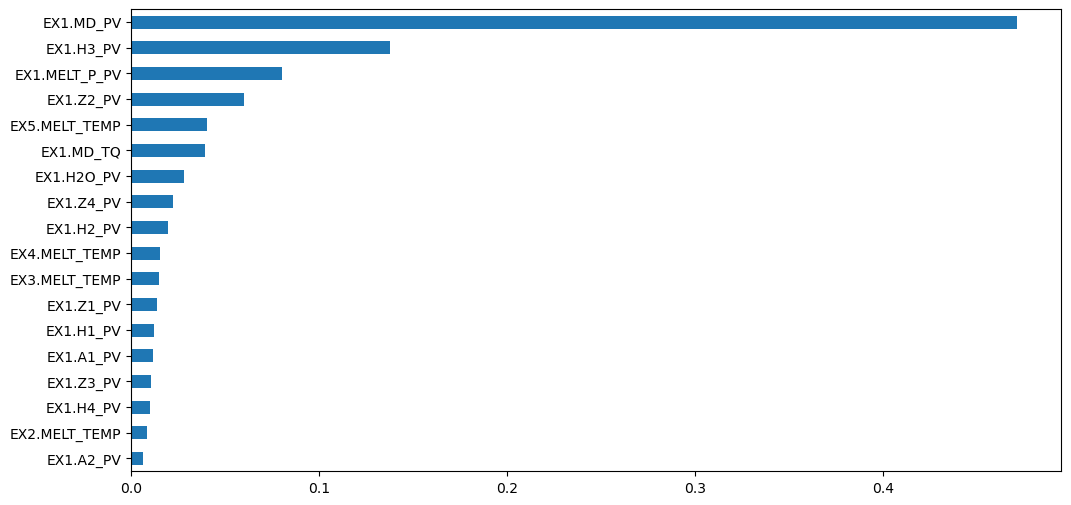

In [68]:
#특성 중요도
#파이프라인 모델에서는 확인이 불가하므로, 미적용 모델을 대상으로 확인

random_classifier_importance = random_classifier_no.feature_importances_
random_classifier_importance = pd.Series(random_classifier_importance, data_nopipe.columns)
plt.figure(figsize=(12, 6))
random_classifier_importance.sort_values().plot.barh();